# Titanic Data Model Building
## The following Notebook is for the building of a **Logistic Regression** model. 
### The goal of the project is to build a model that can predict whether a passenger survived.

First we import necessary dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import mlflow
import mlflow.sklearn

We used this area for definitions of functions that are used

In [3]:
def build_summary_table(input_data,model):
    feature_names = np.transpose(input_data.columns.values)
    summary_data = pd.DataFrame(feature_names,columns=["Feature"])
    summary_data['Coefficient'] = np.transpose(model.coef_)
    summary_data.index = summary_data.index+1
    summary_data.loc[0] = ['Intercept',model.intercept_[0]]
    summary_data = summary_data.sort_index()
    summary_data['Odds_Ratio'] = np.exp(summary_data['Coefficient'])
    summary_data = summary_data.sort_values('Odds_Ratio',ascending=False)
    return summary_data

In [4]:
def build_summary_image(summary_data):
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    sns.barplot(x='Feature', y = 'Coefficient',data=summary_data)
    plt.subplot(212)
    sns.barplot(x='Feature', y = 'Odds_Ratio',data=summary_data)
    return fig

In [5]:
data = pd.read_csv("preprocessed_titanic_data.csv")
data.head()

,pclass,is_female,Cherbourg,Queenstown,Southampton,age,sibsp,parch,fare,survived
0,1,1,0,0,1,-0.008265,-0.479087,-0.445000,3.442584,1
1,1,0,0,0,1,-2.168193,0.481288,1.866526,2.286639,1
2,1,1,0,0,1,-2.084875,0.481288,1.866526,2.286639,0
3,1,0,0,0,1,0.068646,0.481288,1.866526,2.286639,0
4,1,1,0,0,1,-0.315911,0.481288,1.866526,2.286639,0


We separate the input and target data and apply a 75/25 split

In [6]:
x,y = data[['pclass','is_female','Cherbourg','Queenstown','Southampton','age','sibsp','parch','fare']], data[['survived']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25, random_state=42)
print("X Train : ", str(x_train.shape) )
print("Y Train : ", str(y_train.shape) )
print("X Test : ", str(x_test.shape) )
print("Y Test : ", str(y_test.shape) )

X Train :  (981, 9)
Y Train :  (981, 1)
X Test :  (328, 9)
Y Test :  (328, 1)


We build and train the model

C:\Users\Donovan Wilson\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Donovan Wilson\.conda\envs\myenv\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy :  79 %


Registered model 'Logistic_Regression_Model' already exists. Creating a new version of this model...
Created version '2' of model 'Logistic_Regression_Model'.


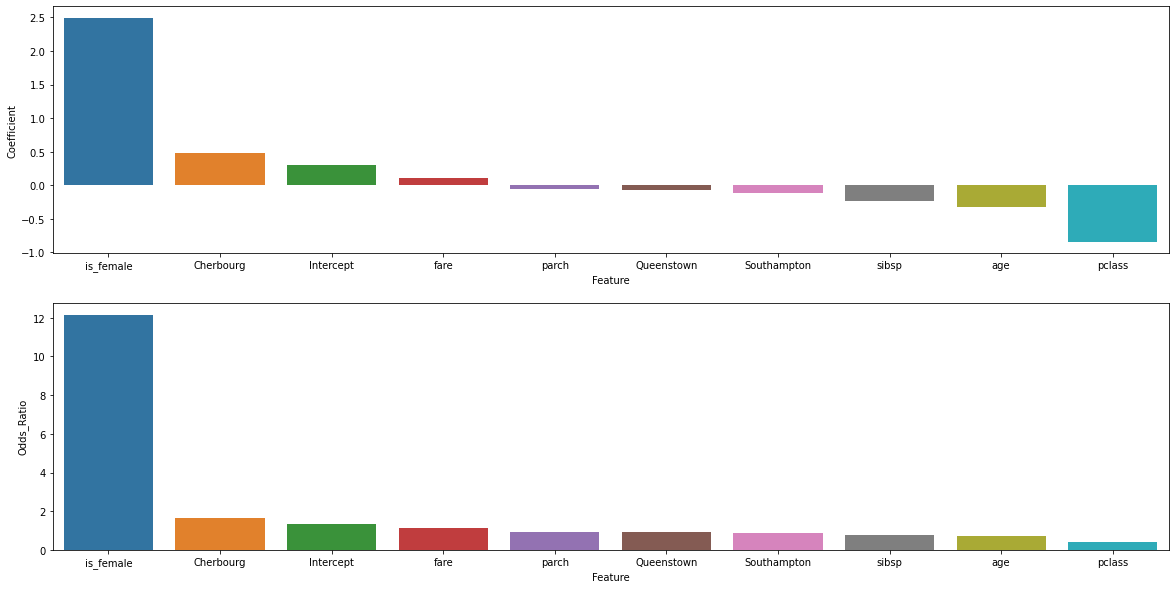

In [16]:
mlflow.set_tracking_uri("http://localhost:5000")
experiment_name = "Titanic"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    #Build and Train Model
    lr_model = LogisticRegression(random_state=0)
    lr_model.fit(x_train,y_train)
    
    #Test Model
    accuracy = lr_model.score(x_test,y_test)
    print("Accuracy : ", str(int(accuracy*100)), "%")
    mlflow.log_metric('Accuracy' , accuracy)
    
    #Decompose Model
    summary_table = build_summary_table(x,lr_model)
    summary_table.to_csv("Logistic_Regression_Model_Summary.csv", index=False)
    mlflow.log_artifact("Logistic_Regression_Model_Summary.csv")
    summary_chart = build_summary_image(summary_table)
    summary_chart.savefig("Logistic_Regression_Model_Summary_Chart.png")
    mlflow.log_artifact("Logistic_Regression_Model_Summary_Chart.png")
    
    mlflow.sklearn.log_model(lr_model, "LR_Model", registered_model_name = "Logistic_Regression_Model")
    